# Deep learning regression model

## Project goal
The goal of this project is to develop a deep learning regression model which is to predict the probability that a student will be accepted to graduate schools. This willl be based on different application factors from a dataset from kaggle. 


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer


## The dataset
The dataset being used is from Kaggle. It contains information about 500 students from different universities. The dataset consists of different types of attributes like their GRE Score,TOEFL Score,University Rating and so on.


In [111]:
df = pd.read_csv('admissions_data.csv')
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [112]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


From looking at these we can drop the "Serial No." column, since this isn't a very descriptive column :) 

In [113]:
df = df.drop(['Serial No.'], axis=1)

Now we need to split the data into two parts, namely into features and labels. The features are all the attributes which describes the student and are attributes which affects their chance of admittance. The label is the last column, namely "Chance of admittance"

In [114]:
features = df.iloc[:,0:-1]
labels = df.iloc[:,-1]

## Splitting and standardizing the data

We need to split the data into both training and test set and also there is a need to standardize some of the columns

a) Splitting the data

We will be using a test size of 33% and a random state of 42.

In [115]:
features_training_set, features_test_set, labels_training_set, labels_test_set = train_test_split(features,labels, test_size=0.33, random_state=42)

b) Standardizing the data



In [116]:
ct = ColumnTransformer([('normalize', Normalizer(), ['GRE Score', 'TOEFL Score', 'CGPA'])], remainder='passthrough')

features_train_norm = ct.fit_transform(features_training_set)
features_test_norm = ct.transform(features_test_set)


## Creating the deep learning model

Here I have decided to implement a function which creates the deep learning model aka. the neural network we are going to use for this modelling task 

In [117]:
def create_model(features):
    model = Sequential(name="NeuralNet")

    # Adding the input layer to model
    num_features = features.shape[1] 
    input = layers.InputLayer(input_shape=num_features,)
    model.add(input) 

    # Adding the hidden layer to the model 
    model.add(Dense(100, activation='relu'))

    # Adding the output layer to model 
    model.add(Dense(1))

    # Adding an optimizer to the model 
    opt = Adam(learning_rate=0.001)
    model.compile(loss ='mse', metrics =['mae'], optimizer = opt)

    print(model.summary())
    return model


The function takes in a parameter features, which is used to decied the dimension of the input layer. 

The hidden layer will use the ReLU for its activation of the nodes. While the output layer will consist of one node. 

For the optimizer we will use Adam with a learning rate of 0.01. More over the loss function we will be using is the mean-squared error (MSE), because it's a regression model, and we will use mean-average error (MAE)as the metric. 




In [118]:
model = create_model(features_training_set)

Model: "NeuralNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
None


Applying early stopping for efficiency

In [119]:
stop = EarlyStopping(monitor = 'val_loss',mode='min',patience = 20)

## Training the model

Now we need to train and fit the model using our features and labels. Here we must choose parametres such as epochs, batch_size and verbose. 

In [120]:
history = model.fit(features_training_set, labels_training_set, epochs = 200, batch_size = 1, verbose = 1, validation_split=.3, callbacks=[stop])

Epoch 1/200
234/234 [==============================] - 3s 10ms/step - loss: 129.0107 - mae: 3.8776 - val_loss: 0.0868 - val_mae: 0.2381
Epoch 2/200
234/234 [==============================] - 0s 1ms/step - loss: 0.0920 - mae: 0.2390 - val_loss: 0.0811 - val_mae: 0.2272
Epoch 3/200
234/234 [==============================] - 0s 1ms/step - loss: 0.0954 - mae: 0.2387 - val_loss: 0.0683 - val_mae: 0.2128
Epoch 4/200
234/234 [==============================] - 0s 1ms/step - loss: 0.0770 - mae: 0.2165 - val_loss: 0.1641 - val_mae: 0.3331
Epoch 5/200
234/234 [==============================] - 0s 2ms/step - loss: 0.0831 - mae: 0.2304 - val_loss: 0.0821 - val_mae: 0.2431
Epoch 6/200
234/234 [==============================] - 0s 1ms/step - loss: 0.0753 - mae: 0.2212 - val_loss: 0.0512 - val_mae: 0.1766
Epoch 7/200
234/234 [==============================] - 0s 1ms/step - loss: 0.0704 - mae: 0.2146 - val_loss: 0.1461 - val_mae: 0.3424
Epoch 8/200
234/234 [==============================] - 0s 1ms/step

Above the training stops at 64/200 due to the early stopping criterion

## Evaluating the model

In [121]:
val_mse, val_mae = model.evaluate(features_training_set, labels_training_set, verbose = 0)

print(f"The value of mean-average error is: {val_mae}\nThis means that the model is {val_mae*100}% off")

The value of mean-average error is: 0.2594462037086487
This means that the model is 25.944620370864868% off


In [122]:
y_predict = model.predict(features_test_set)
r2 = r2_score(labels_test_set,y_predict)
print(f"The r2 score is {r2}\nThis means the deep learning model has correct predictions {r2*100}% of the time")

The r2 score is -2.6961369809349995
This means the deep learning model has correct predictions -269.6136980935% of the time


# Plots 

Here I will be trying to plot the deep learning model loss per epoch as well as the mean-average error per epoch for both training and validation data. 

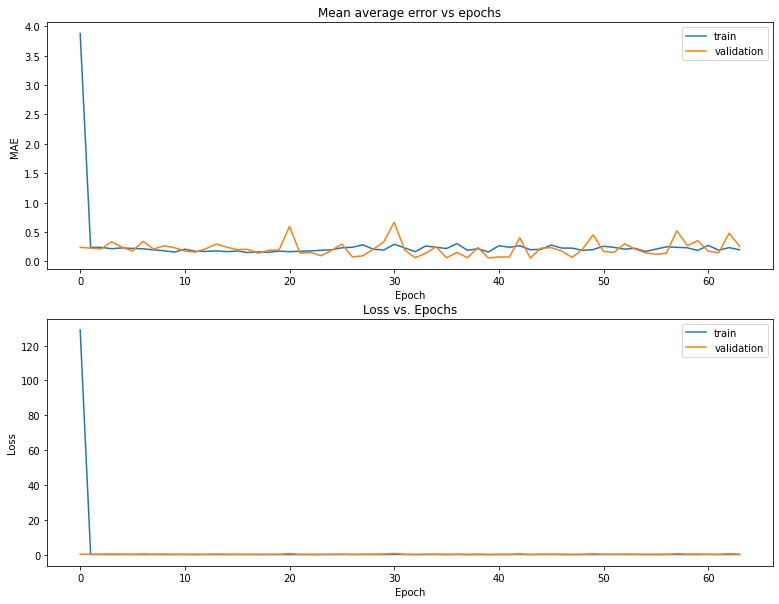

In [123]:

train_mae = history.history['mae']
train_mae_val = history.history['val_mae']

fig = plt.figure(figsize=(13,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(train_mae)
ax1.plot(train_mae_val)
ax1.set_title('Mean average error vs epochs')
ax1.set_ylabel('MAE')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'validation'], loc='upper right')


train_loss = history.history['loss']
train_loss_val = history.history['val_mae']
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(train_loss)
ax2.plot(train_loss_val)
ax2.set_title('Loss vs. Epochs')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'validation'], loc='upper right')

plt.show()